In [1]:
# imports
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import utilities as u
import single_session_plots as ssp
import numpy as np
import scipy as sp
import sklearn as sk
from matplotlib import pyplot as plt
from LatentVarFuncs import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# load data
mouse = '4139190.1'
df = u.load_session_db()
#ca1mice = ['4139190.1','4139190.3', '4054011.1','4139202.2']
#dgmice = ['4054010.4','4054010.5']


df = df[df['RewardCount']>10]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse = df_mouse.sort_values(['DateTime'])
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
150,4139190.1,16_06_2018,2,TwoTower_Timeout,19,1,2018-06-16,G:\My Drive\\VR_Data\TwoTower\4139190.1\16_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...
210,4139190.1,19_06_2018,2,TwoTower_Timeout,75,1,2018-06-19,G:\My Drive\\VR_Data\TwoTower\4139190.1\19_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...
175,4139190.1,21_06_2018,3,TwoTower_Timeout,92,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...
177,4139190.1,21_06_2018,2,TwoTower_Timeout,20,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...
169,4139190.1,24_06_2018,2,TwoTower_Timeout,104,1,2018-06-24,G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
173,4139190.1,25_06_2018,2,TwoTower_Timeout,62,1,2018-06-25,G:\My Drive\\VR_Data\TwoTower\4139190.1\25_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...
205,4139190.1,27_06_2018,2,TwoTower_Timeout,81,1,2018-06-27,G:\My Drive\\VR_Data\TwoTower\4139190.1\27_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...
160,4139190.1,28_06_2018,8,TwoTower_Timeout,22,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...
164,4139190.1,28_06_2018,2,TwoTower_Timeout,17,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...
165,4139190.1,28_06_2018,9,TwoTower_Timeout,18,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...


In [3]:
# pick candidate session
sess = df_mouse.iloc[4]
sess

MouseName                                                4139190.1
DateFolder                                              24_06_2018
SessionNumber                                                    2
Track                                             TwoTower_Timeout
RewardCount                                                    104
Imaging                                                          1
DateTime                                       2018-06-24 00:00:00
data file        G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...
scanfile         G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
scanmat          G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
Name: 169, dtype: object

G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:479: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_m

G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array


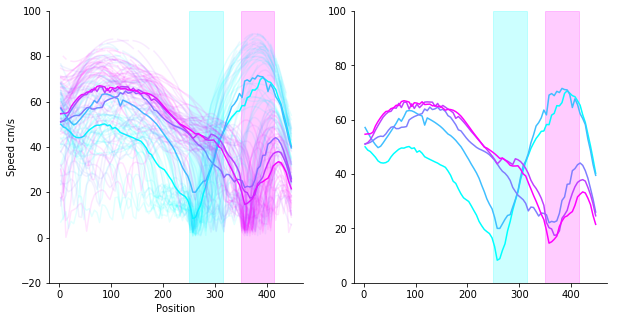

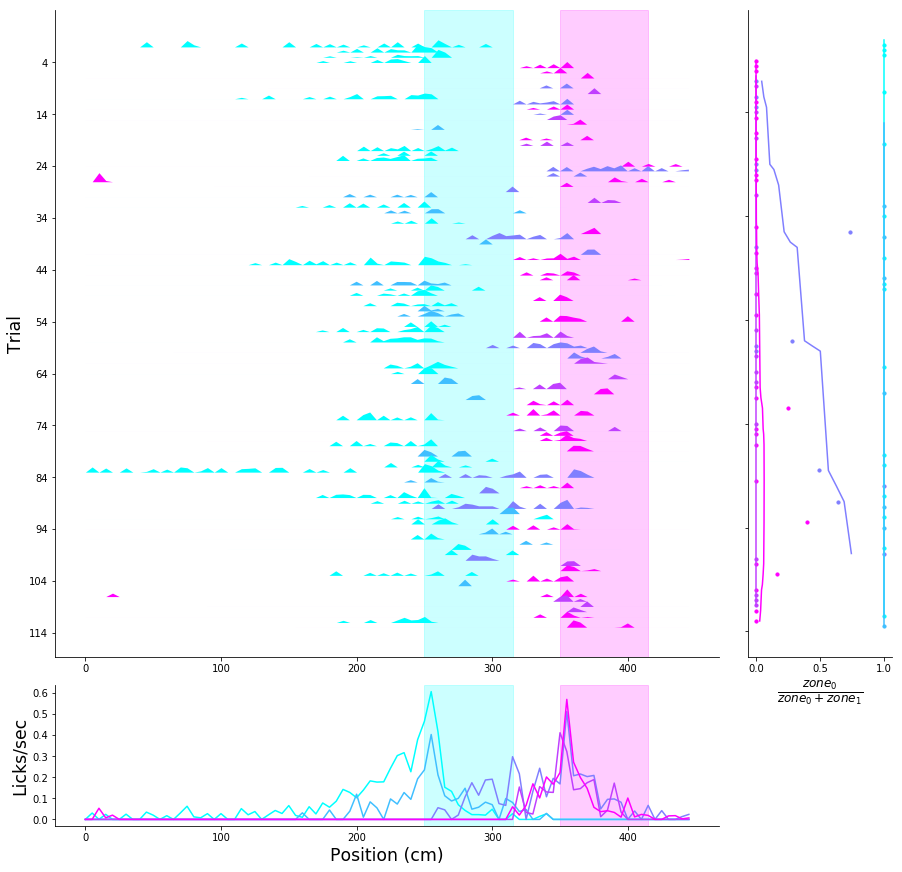

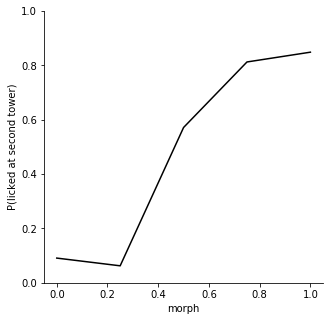

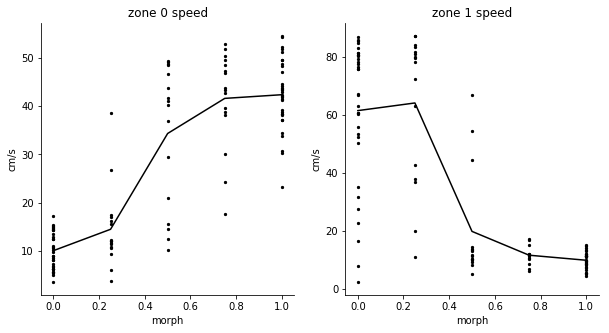

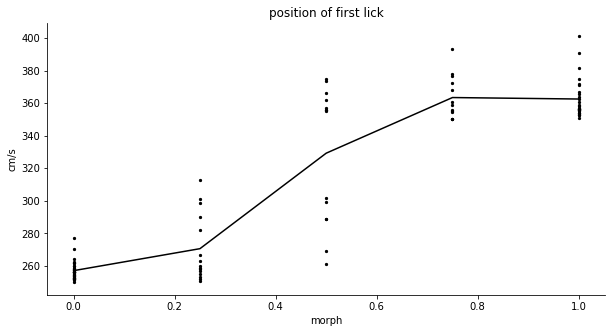

In [4]:
# get behavior and imaging data
behav = u.behavior_dataframe(sess['data file'],sess['scanmat'],concat=False)
tmp = ssp.run_behavior(behav,ratio = True)

info = u.loadmat_sbx(sess['scanmat'])['info']
ca_dat = u.load_ca_mat(sess['scanfile'])

C = ca_dat['C_keep'][info['frame'][0]:info['frame'][-1]+1]

frame_diff = behav.shape[0]-C.shape[0]
if frame_diff>0:
    behav = behav.iloc[:-frame_diff]
    
    
C_z = sp.stats.zscore(C,axis=0)


In [86]:
# fit glm
maze_inds = behav['pos']>0
dmat = pos_morph_design_matrix(behav['pos']._values, behav['morph']._values)
train_inds = ((behav['morph']==1) | (behav['morph']==0)) & (behav['pos']>0)
dmat_extreme = dmat[train_inds,:]
C_extreme = C_z[train_inds,:]

glm_extreme = sk.linear_model.LinearRegression()
glm = sk.linear_model.LinearRegression()

# for cells in session
glm_extreme.fit(dmat[train_inds,:],C_z[train_inds,:])
glm.fit(dmat[maze_inds,:],C_z[maze_inds,:])
mu_extreme_hat = glm_extreme.predict(dmat_extreme)

In [83]:
# find cumulative distribution

In [5]:
# get empirical cumulative distribution
i = 430
morph0_inds = (behav['morph']==0 ) & (behav['pos']>0)
P_y_x,mu_y_x = empirical_density(behav['pos']._values[morph0_inds],C_z[morph0_inds,i])

(47, 20)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


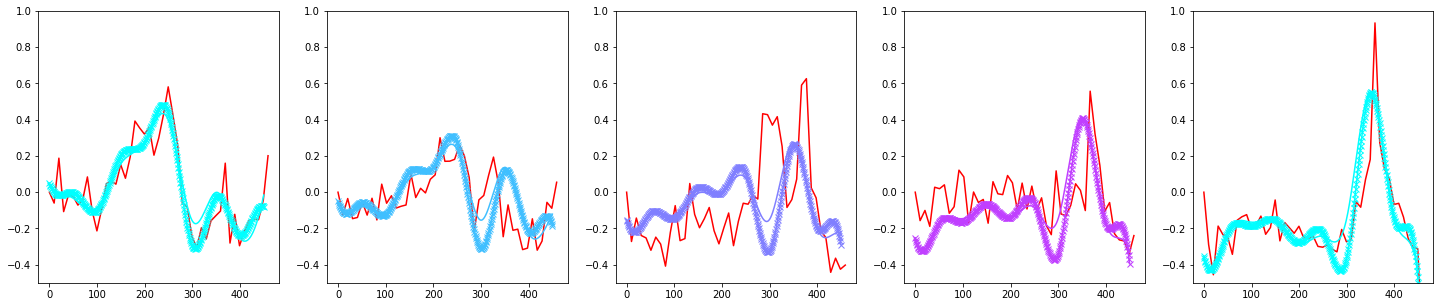

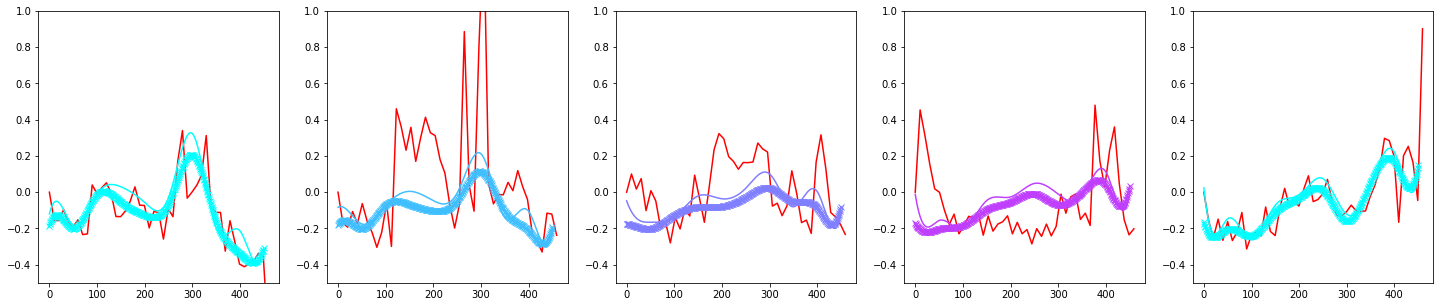

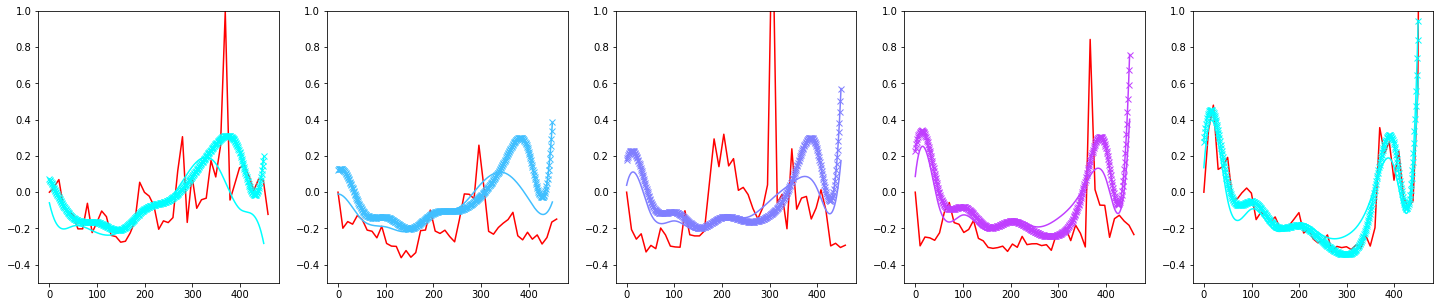

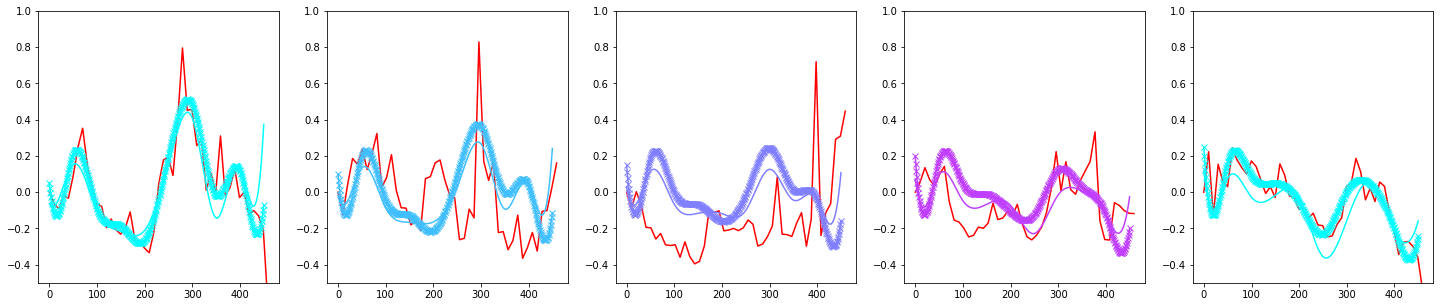

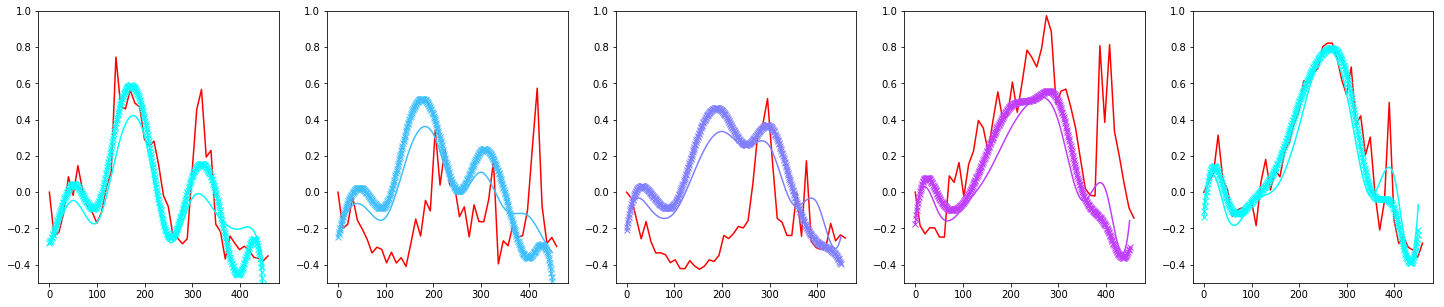

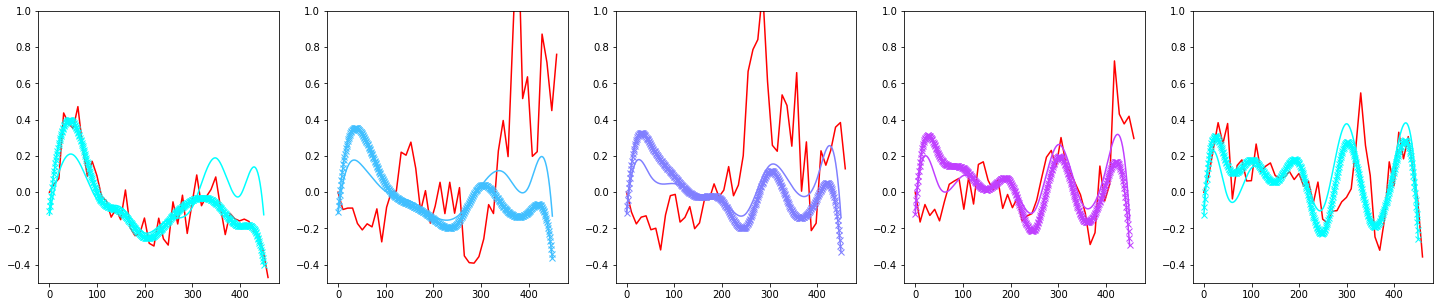

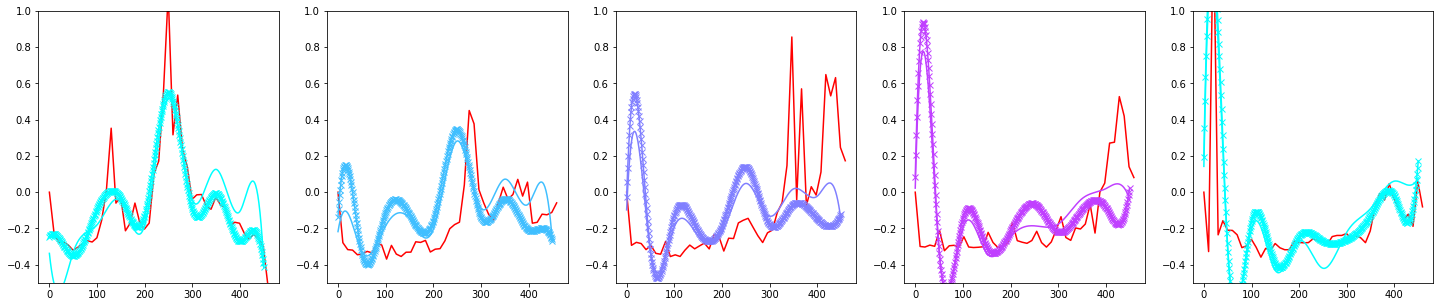

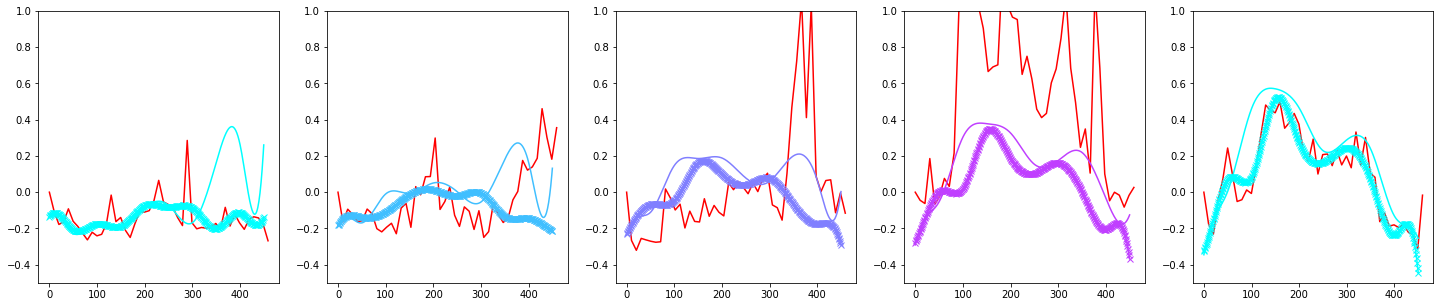

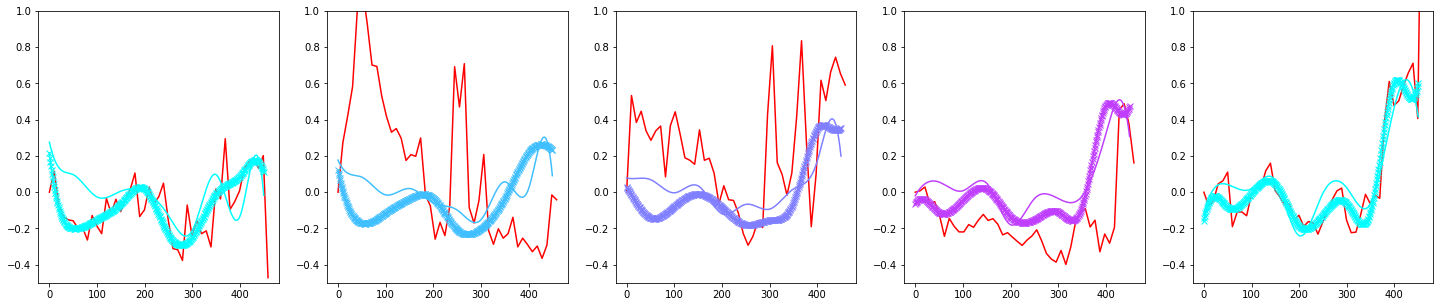

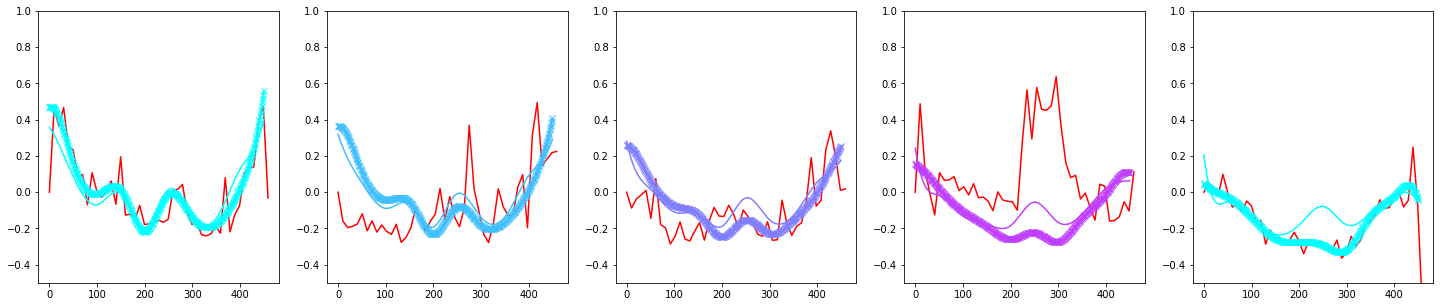

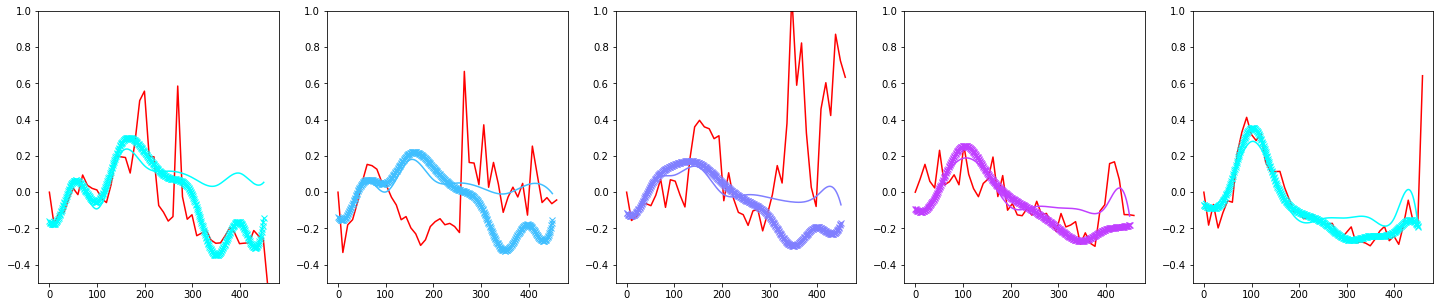

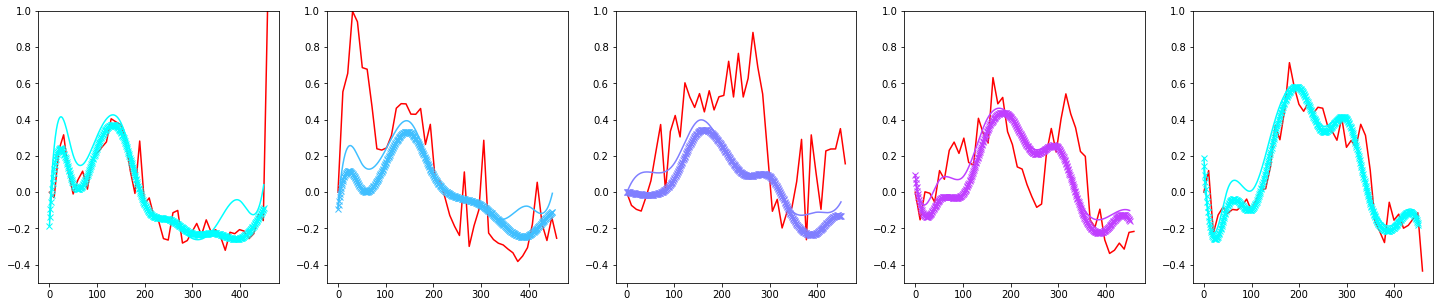

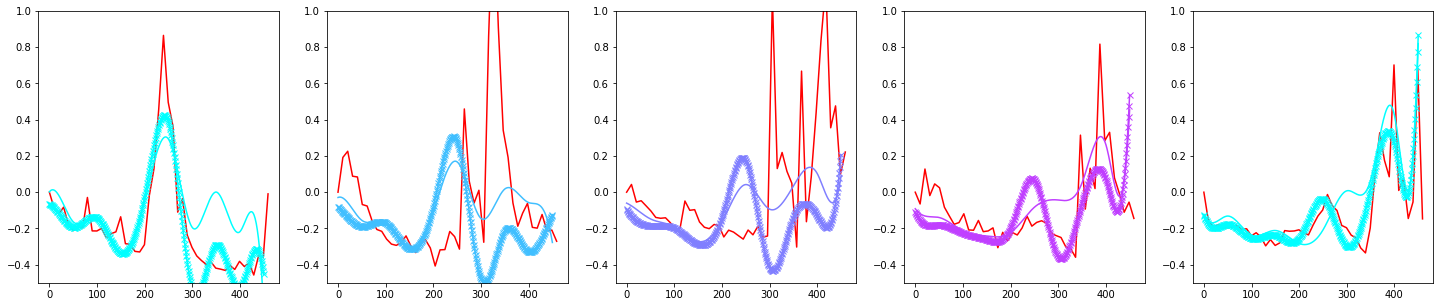

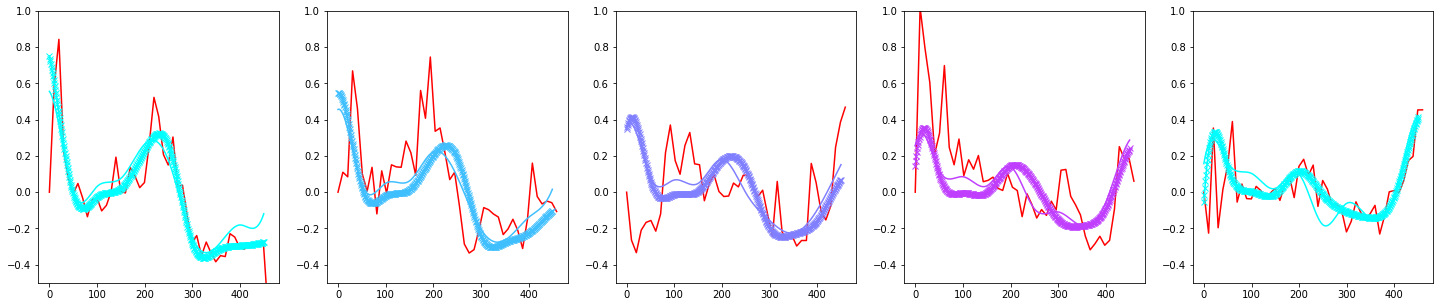

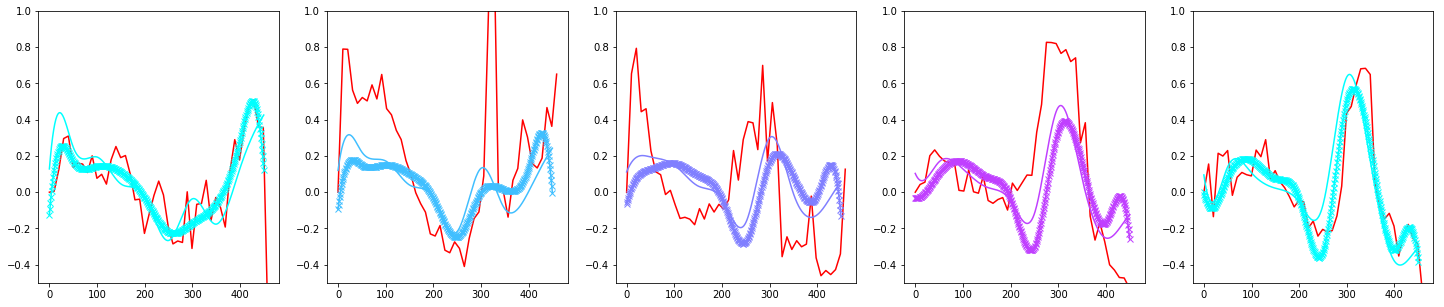

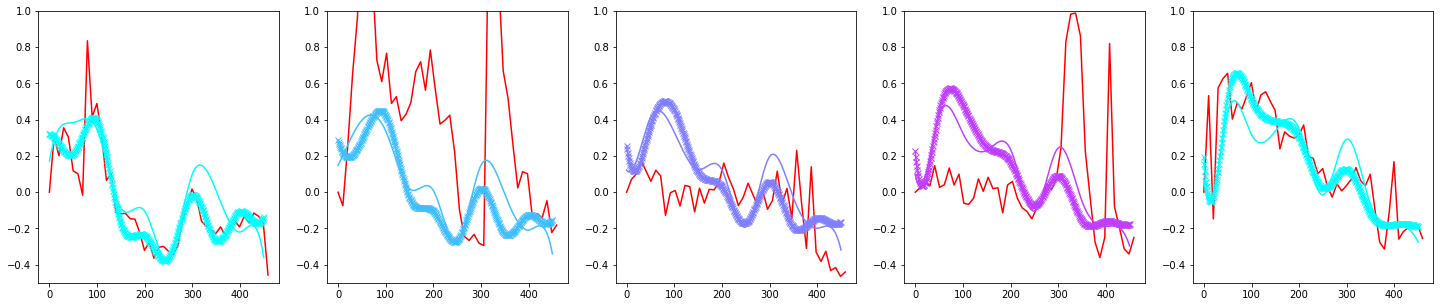

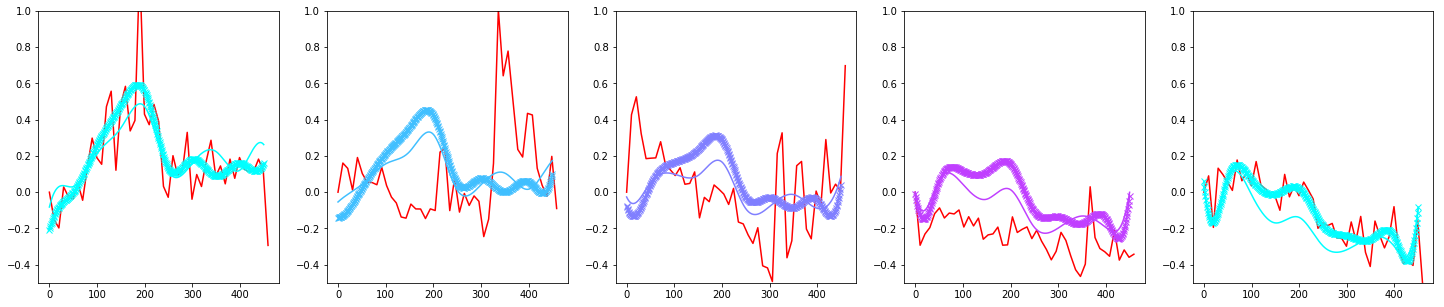

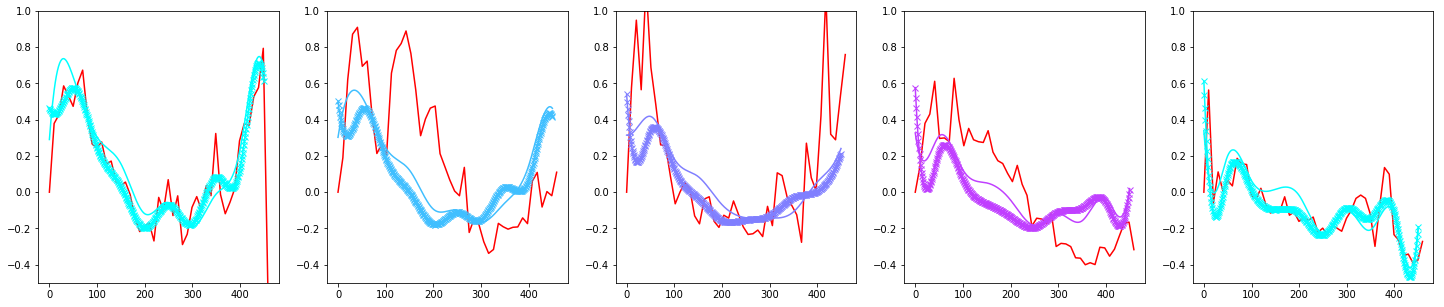

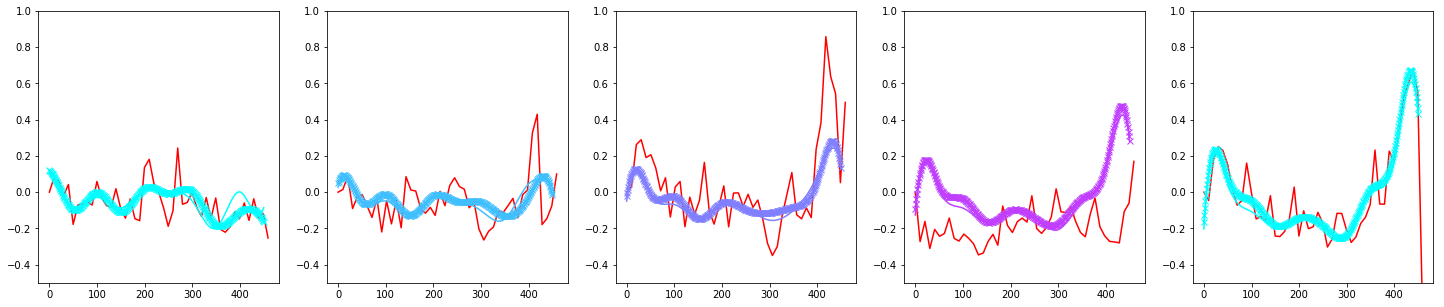

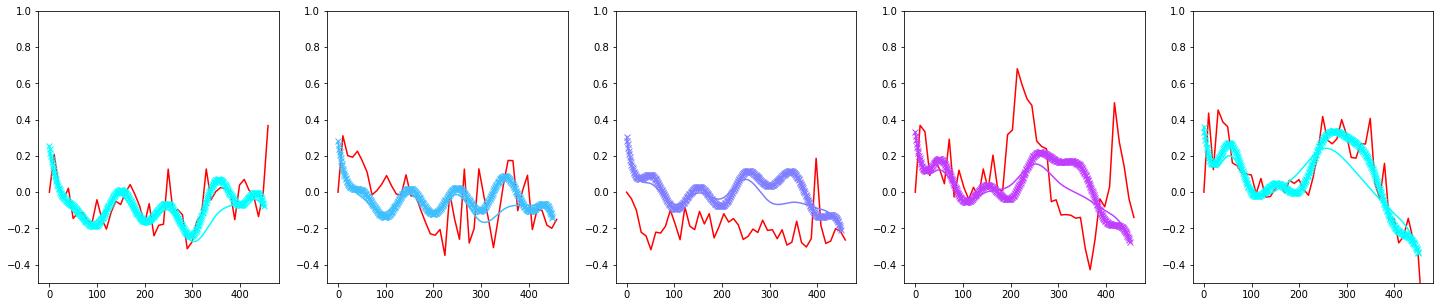

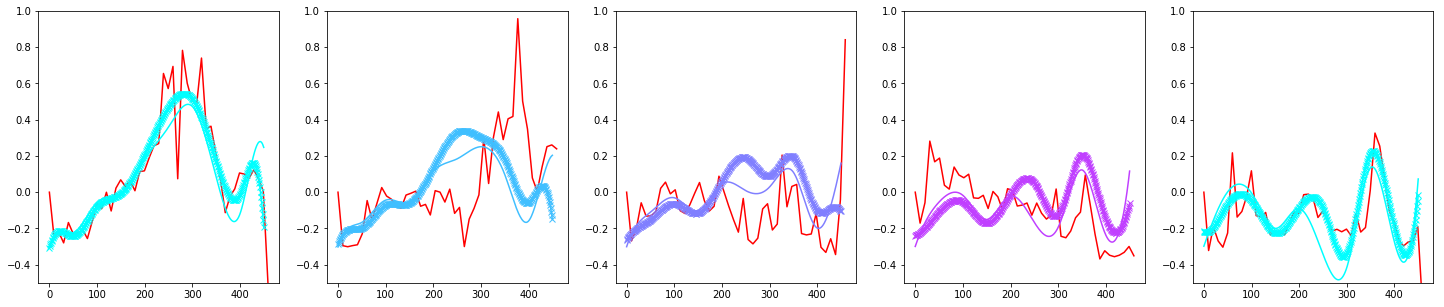

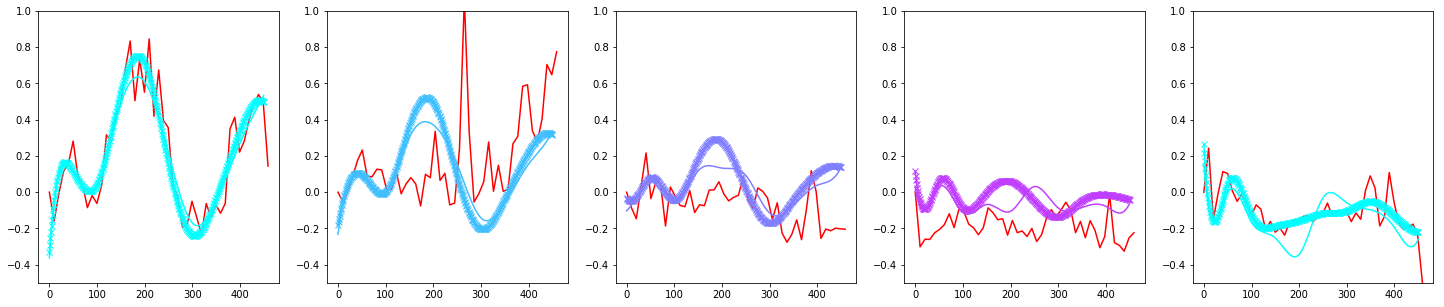

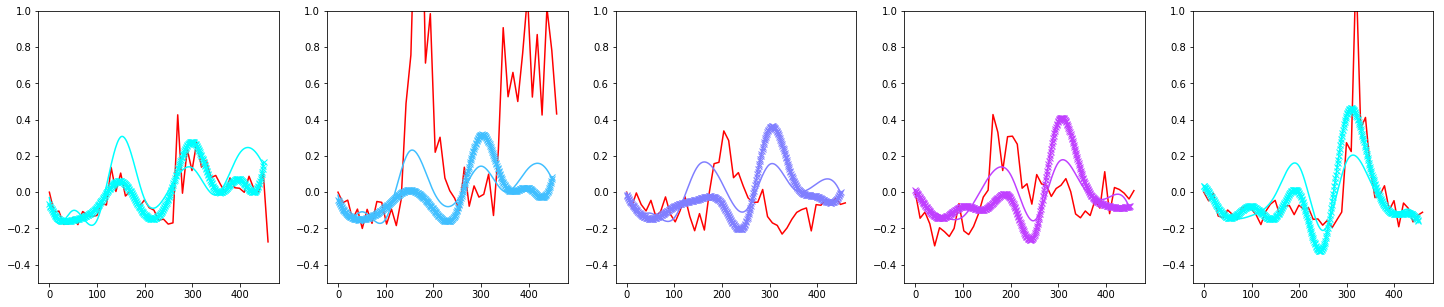

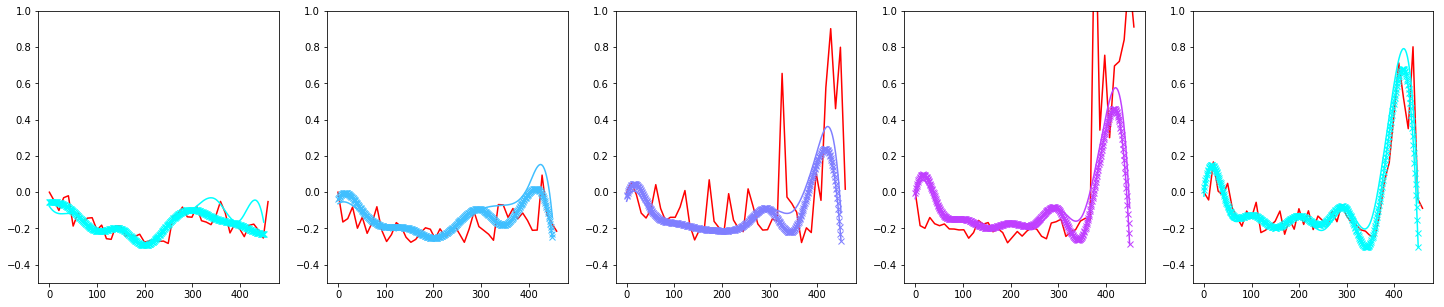

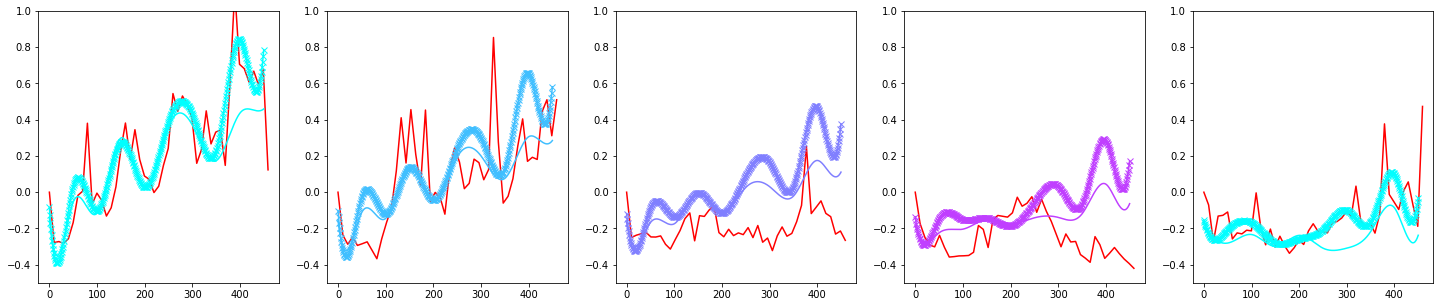

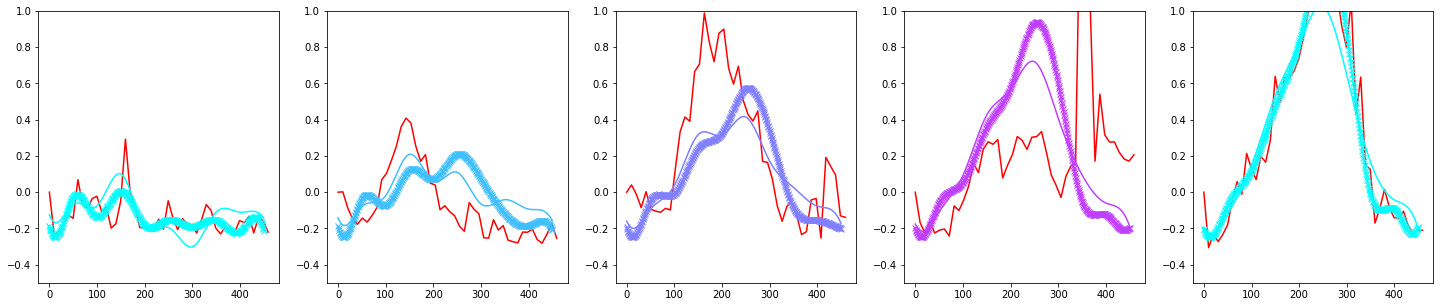

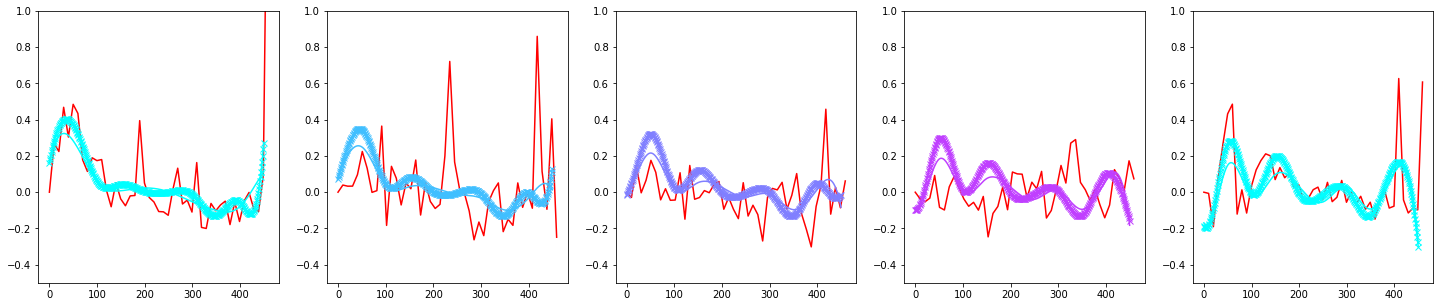

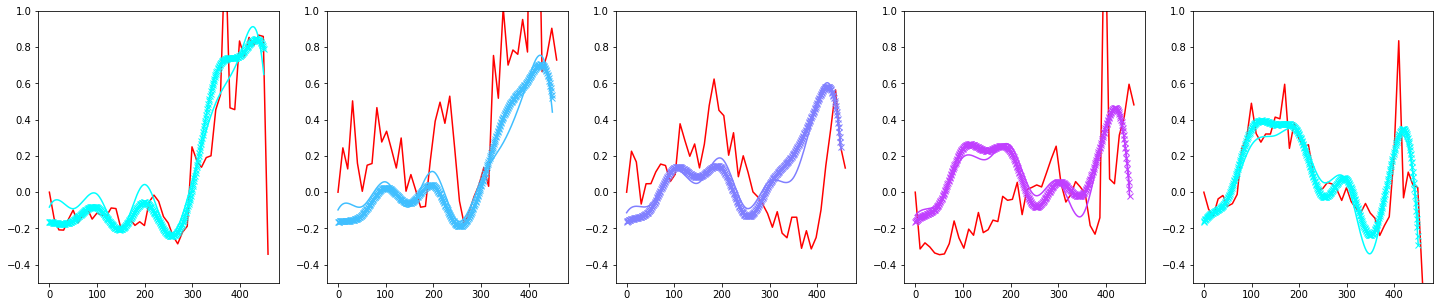

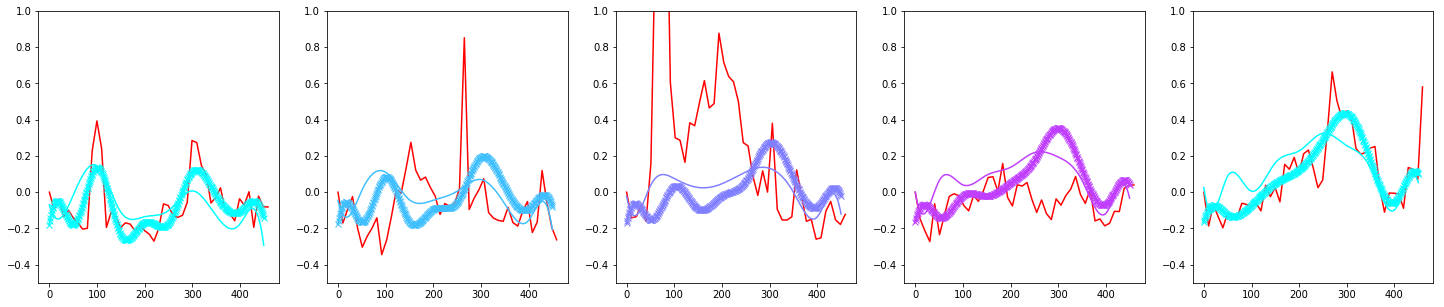

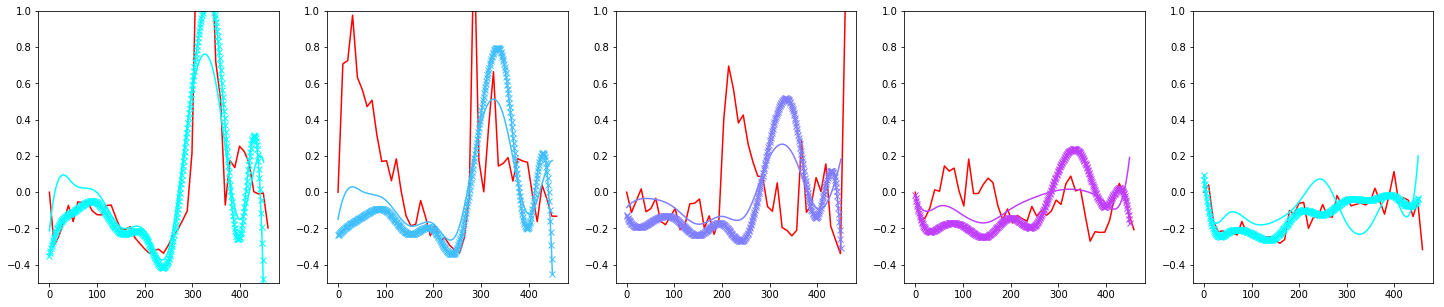

In [87]:

# check some empirical distributions for morph values agains glm fit on all trials


for i in range(0,1500,50):
    basis0 = pos_morph_design_matrix(x,np.zeros([x.shape[0],]))
    basis1 = pos_morph_design_matrix(x,np.ones([x.shape[0],]))
    yhat0 = glm.predict(basis0)
    yhat1 = glm.predict(basis1)
    f,ax = plt.subplots(1,5,figsize=[25,5])
    for j, m in enumerate([0, .25, .5, .75, 1]):
        morph_inds = (behav['morph']==m ) & (behav['pos']>0)
        P_y_x,mu_y_x = empirical_density(behav['pos']._values[morph_inds],C_z[morph_inds,i])

        x = np.linspace(0,450,400)

        basis = pos_morph_design_matrix(x,m*np.ones([x.shape[0],]))
        yhat = glm.predict(basis)
        yhat_extreme = glm_extreme.predict(basis)
        ax[j].plot(np.linspace(0,459,mu_y_x.shape[0]),mu_y_x,color='r')
        ax[j].plot(x,yhat[:,i],color = plt.cm.cool(m))
        ax[j].plot(x,yhat_extreme[:,i],color=plt.cm.cool(m),marker='x')
        ax[j].set_ylim([-.5,1])
        
        
#plt.plot(np.linspace(0,450,47),mu_y_x)
#plt.plot(x,yhat1[:,i])


In [11]:
print(ymin,ymax)
print(np.floor(ymin),np.ceil(ymax))

-1.0503857039217182 41.9161160679856
-2.0 42.0


In [ ]:
# KS plots

- fit second regression using results of first
- affine constraint that weights are on the probability simplex
$$ \underset{\theta}{min} ||f_I - \theta f_0 - (1-\theta)f_1||_2^2 \\
 \hat{\theta} = \frac{(f_I-f_1)^T (f_0 - f_1)}{(f_0 - f_1)^T (f_0 - f_1)} $$
 
 - from looking at maps, doesn't seem like convex combination is going to work, novelty facilitation, so trying any linear combination


In [ ]:

# get maps from previous glm fit
mu_hat_0 = glm_extreme.predict()
mu_hat_1 = glm_extreme.predict()

# make design matrix
dmat = np.hstack((mu_hat_0[np.newaxis].T,mu_hat_1[np.newaxis].T))

for m in [.25, .5, .75]:
    morph_glm = sk.linear_model.LinearRegression()
    
